In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['6th Grade','2013','6th Grade','2013'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,"LOCKE, A CHTR",400011,Charter/Contract,6th Grade,2013,41,0.0,-1.1 to 1.2,53,Yellow,41,0.8,0.1 to 1.5,83,Green,"LOCKE, A CHTR",400011,4730,Charter,6th Grade,2013,68.3,68.3,68.3,9.8,14.6,12.2,58.5,53.7,56.1,29.3,29.3,29.3,2.4,2.4,2.4,41,41
1,AMANDLA CHTR HS,400012,Charter/Contract,6th Grade,2013,57,-1.3,-2.4 to -0.3,6,Red,57,-0.8,-1.4 to -0.2,18,Red,AMANDLA CHTR HS,400012,2035,Charter,6th Grade,2013,22.6,17.0,19.8,1.9,1.9,1.9,20.8,15.1,17.9,66.0,56.6,61.3,11.3,26.4,18.9,53,53
2,ASPIRA CHTR - HAUGAN,400017,Charter/Contract,6th Grade,2013,113,0.3,-0.5 to 1.1,69,Yellow,113,0.0,-0.5 to 0.4,50,Yellow,ASPIRA CHTR - HAUGAN,400017,3500,Charter,6th Grade,2013,38.5,36.8,37.6,4.3,4.3,4.3,34.2,32.5,33.3,50.4,48.7,49.6,11.1,14.5,12.8,117,117


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(451, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     49.25
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           8.46e-12
Time:                        22:54:07   Log-Likelihood:                -1906.8
No. Observations:                 446   AIC:                             3818.
Df Residuals:                     444   BIC:                             3826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     49.3878      0.826     59.800      0.000        47.765    51.011
x              6.8356      0.974      7.018      0.000         4.921     8.750
==============================================================================
Omnibus:                       10.164   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.325
Skew:                           0.371   Prob(JB):                      0.00573
Kurtosis:                       3.075   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

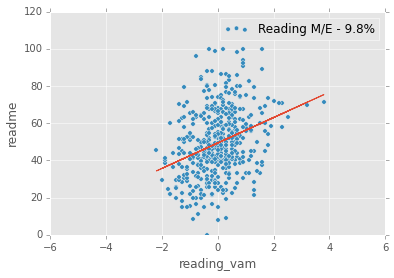

In [6]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E - 9.8%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     26.43
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           4.09e-07
Time:                        22:54:41   Log-Likelihood:                -1767.9
No. Observations:                 446   AIC:                             3540.
Df Residuals:                     444   BIC:                             3548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.4432      0.605     18.920      0.000        10.255    12.632
x              3.6673      0.713      5.141      0.000         2.266     5.069
==============================================================================
Omnibus:                      287.412   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2514.093
Skew:                           2.763   Prob(JB):                         0.00
Kurtosis:                      13.235   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

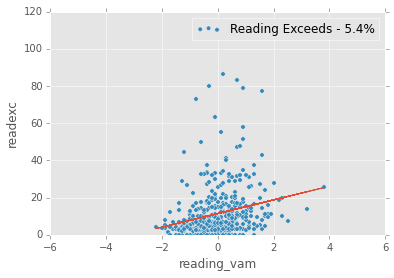

In [7]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading Exceeds - 5.4%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     26.47
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           4.02e-07
Time:                        22:55:04   Log-Likelihood:                -1702.9
No. Observations:                 446   AIC:                             3410.
Df Residuals:                     444   BIC:                             3418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     37.9437      0.523     72.576      0.000        36.916    38.971
x              3.1725      0.617      5.145      0.000         1.961     4.384
==============================================================================
Omnibus:                        3.721   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.669
Skew:                          -0.222   Prob(JB):                        0.160
Kurtosis:                       2.993   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

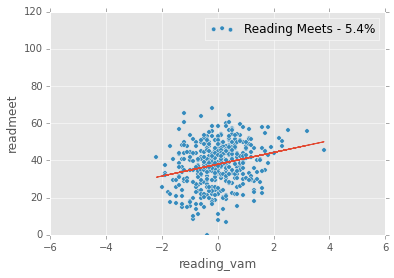

In [8]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading Meets - 5.4%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     28.18
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.75e-07
Time:                        22:55:40   Log-Likelihood:                -1805.3
No. Observations:                 446   AIC:                             3615.
Df Residuals:                     444   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     41.7449      0.658     63.469      0.000        40.452    43.038
x             -4.1175      0.776     -5.308      0.000        -5.642    -2.593
==============================================================================
Omnibus:                       13.062   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.377
Skew:                          -0.411   Prob(JB):                      0.00125
Kurtosis:                       3.214   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

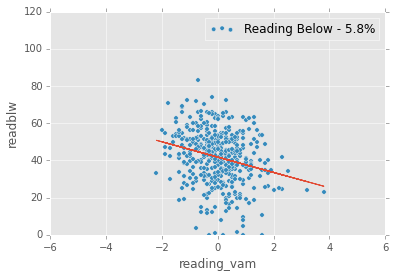

In [9]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below - 5.8%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     45.37
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           5.08e-11
Time:                        22:57:27   Log-Likelihood:                -1514.0
No. Observations:                 446   AIC:                             3032.
Df Residuals:                     444   BIC:                             3040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.8688      0.342     25.910      0.000         8.196     9.542
x             -2.7190      0.404     -6.735      0.000        -3.512    -1.926
==============================================================================
Omnibus:                      265.588   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3598.859
Skew:                           2.291   Prob(JB):                         0.00
Kurtosis:                      16.141   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

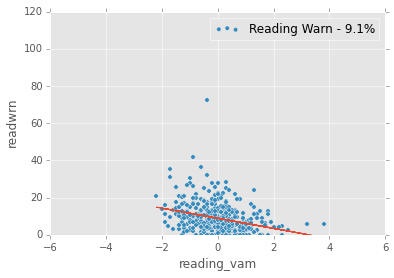

In [10]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading Warn - 9.1%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     109.3
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           5.20e-23
Time:                        23:01:28   Log-Likelihood:                -1925.1
No. Observations:                 446   AIC:                             3854.
Df Residuals:                     444   BIC:                             3862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     50.7699      0.862     58.931      0.000        49.077    52.463
x              9.1903      0.879     10.453      0.000         7.462    10.918
==============================================================================
Omnibus:                        3.859   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.934
Skew:                           0.212   Prob(JB):                        0.140
Kurtosis:                       2.823   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

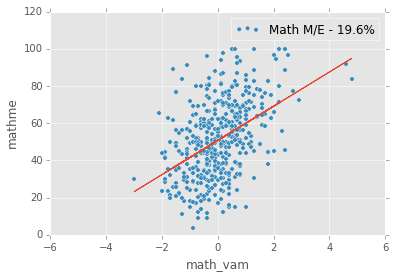

In [11]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math M/E - 19.6%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     73.12
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.99e-16
Time:                        23:01:42   Log-Likelihood:                -1723.0
No. Observations:                 446   AIC:                             3450.
Df Residuals:                     444   BIC:                             3458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.7436      0.548     15.970      0.000         7.668     9.820
x              4.7782      0.559      8.551      0.000         3.680     5.876
==============================================================================
Omnibus:                      276.626   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2356.968
Skew:                           2.632   Prob(JB):                         0.00
Kurtosis:                      12.956   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

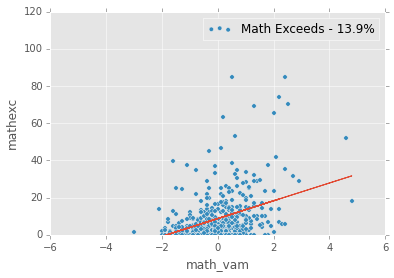

In [12]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds - 13.9%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     47.29
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           2.09e-11
Time:                        23:01:52   Log-Likelihood:                -1784.1
No. Observations:                 446   AIC:                             3572.
Df Residuals:                     444   BIC:                             3580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     42.0277      0.628     66.923      0.000        40.793    43.262
x              4.4073      0.641      6.877      0.000         3.148     5.667
==============================================================================
Omnibus:                        2.130   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                2.210
Skew:                          -0.159   Prob(JB):                        0.331
Kurtosis:                       2.869   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

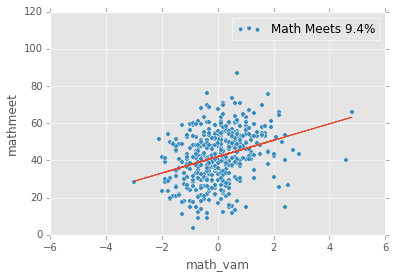

In [13]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets 9.4%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     89.60
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.73e-19
Time:                        23:02:02   Log-Likelihood:                -1807.8
No. Observations:                 446   AIC:                             3620.
Df Residuals:                     444   BIC:                             3628.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.0381      0.662     58.953      0.000        37.737    40.340
x             -6.3971      0.676     -9.466      0.000        -7.725    -5.069
==============================================================================
Omnibus:                        5.606   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.573
Skew:                          -0.274   Prob(JB):                       0.0616
Kurtosis:                       3.012   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

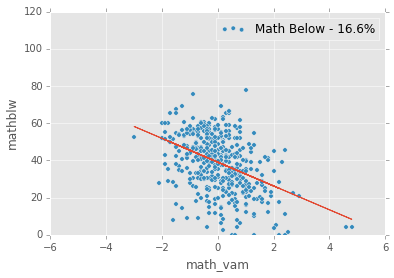

In [14]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math Below - 16.6%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     48.77
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.06e-11
Time:                        23:02:30   Log-Likelihood:                -1573.4
No. Observations:                 446   AIC:                             3151.
Df Residuals:                     444   BIC:                             3159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.1934      0.392     26.036      0.000         9.424    10.963
x             -2.7902      0.400     -6.983      0.000        -3.576    -2.005
==============================================================================
Omnibus:                      237.397   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2590.115
Skew:                           2.043   Prob(JB):                         0.00
Kurtosis:                      14.077   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

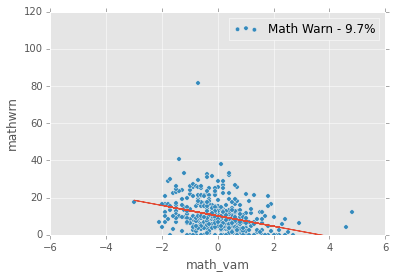

In [15]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn - 9.7%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()